<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter03/Preparing_our_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.3 为图像分类准备数据

In [1]:
# 1. 下载数据集并导入相关的包. torchvision包包含多种数据集, 其中一个是本章中讨论的FashionMNIST数据集
from torchvision import datasets
import torch
data_folder = 'data/FMNIST' # This can be any directory you want
# to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /data/FMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to /data/FMNIST\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /data/FMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to /data/FMNIST\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /data/FMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /data/FMNIST\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /data/FMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /data/FMNIST\FashionMNIST\raw



In [2]:
# 接下来 将从fmnist.data中获取的图像存储为tr_images,
# 将从fmnist.targets中获得的标签存储为tr_targets
tr_images = fmnist.data
tr_targets = fmnist.targets

In [3]:
# 2. 检查正在处理的张量
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX - {tr_images.shape}\n\tY - {tr_targets.shape}\n\tY - Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}')

tr_images & tr_targets:
	X - torch.Size([60000, 28, 28])
	Y - torch.Size([60000])
	Y - Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
# 3. 为所有10个可能类别分别给出10个随机图像样本

# 导入相关包来绘制一个图像网格
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

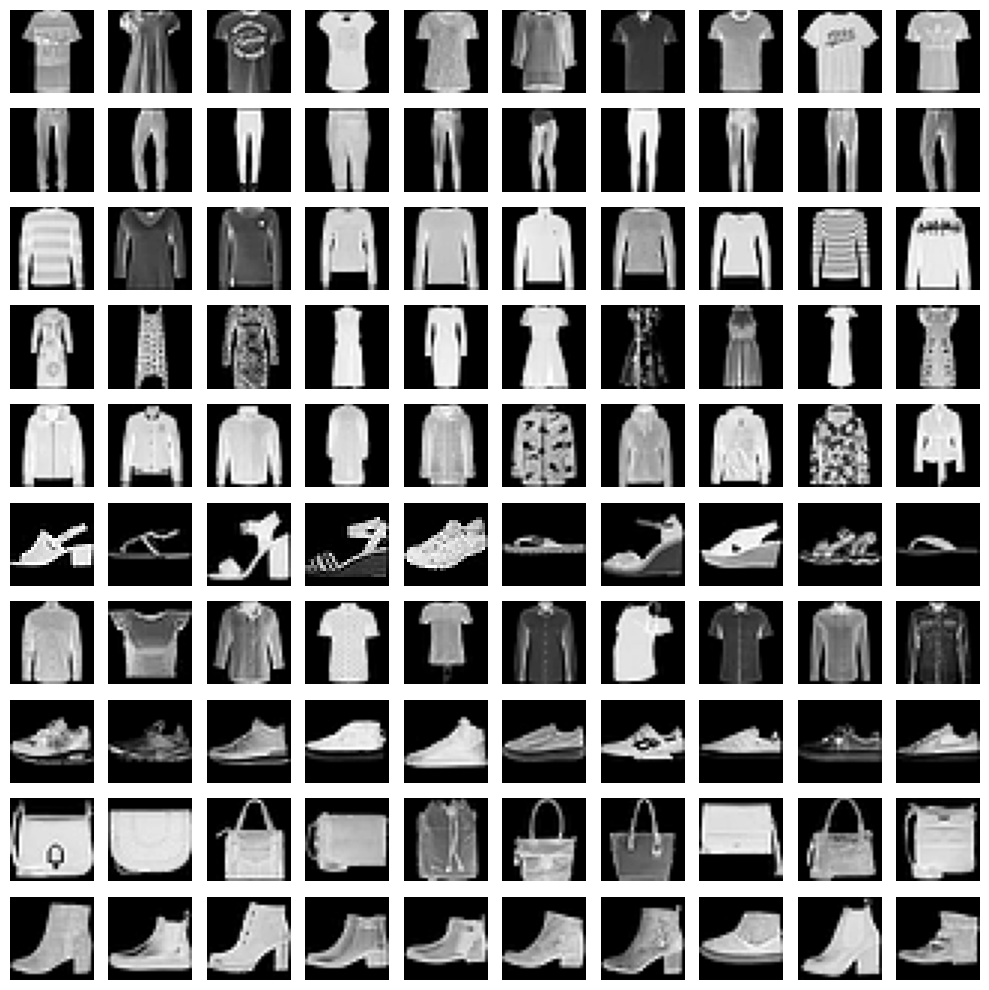

In [5]:
# 创建一个图用于显示10 x 10的网格, 网格中的每行对应一个类别 每一列分属于每个类别的示例图像
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10,10))
# 循环遍历唯一的类号(label_class), 并获取对应于给定类号的行索引(label_x_rows)
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    # 循环10次以填充给定行的列. 此外还需从之前获得的给定类对应的索引中选择一个随机值(ix)并绘制它们
    for plot_cell in plot_row:
        plot_cell.grid(False); plot_cell.axis('off')
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()
